# Quantium1_Data preparation and customer analytics

## Load required libraries

In [94]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy
import pandas_profiling as pf
#pd.set_option('display.max_rows', 400)
%matplotlib inline
print('complete')

complete


## Exploratory data analysis
The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.

## Load Transactions Dataset

In [2]:
# Load Transactions dataset
t_data = pd.read_excel(r'C:\Users\ABDULAZEEZ R.O\Desktop\QVI_transaction_data.xlsx')
print("done")

done


In [3]:
# display the first 5 of the data 
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


__Examining transaction data__

In [4]:
# lets check the sample of the data to unserstand our data better
t_data.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64299,43623,162,162179,162898,75,Cobs Popd Sea Salt Chips 110g,2,7.6
112035,43343,184,184008,186250,86,Cheetos Puffs 165g,2,5.6
175328,43316,67,67216,65108,83,WW D/Style Chip Sea Salt 200g,2,3.8
26808,43370,152,152219,151698,38,Infuzions Mango Chutny Papadums 70g,2,4.8
258507,43537,272,272199,269912,15,Twisties Cheese 270g,2,9.2


In [5]:
# checking the dimemsion of the data
nrows, ncols = t_data.shape
print(f'The number of observation in this dataset are {nrows} \nWhile the number of features are {ncols}')

The number of observation in this dataset are 264836 
While the number of features are 8


Let's check if columns we would expect to be numeric are in numeric form and date columns are in date format.

In [6]:
# chicking the features data type and information
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


All the columns data type are correct except date column, we will change it in the next line of code. It seems there are no missing value in this dataset, we will confirm that later.

In [7]:
# converting date column to normal date format
def convert_date(excel_date):
    
    timp = pd.to_datetime('1899 - 12 -30')
    delta = pd.to_timedelta(excel_date, 'D')
    return timp+delta

t_data['DATE'] = convert_date(t_data.DATE)

In [8]:
#Re-check the sample of the data
t_data.sample(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
172059,2018-08-18,156,156085,157189,8,Smiths Crinkle Cut Chips Original 170g,1,2.9
93674,2019-03-13,185,185020,187845,100,Smiths Crinkle Cut Chips Chs&Onion170g,1,2.9
264263,2019-06-04,247,247066,248991,101,Doritos Salsa Medium 300g,2,5.2
258363,2019-06-23,270,270126,267460,28,Thins Potato Chips Hot & Spicy 175g,2,6.6
1490,2018-10-28,79,79063,77104,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2
91485,2018-10-17,154,154268,154576,71,Twisties Cheese Burger 250g,2,8.6


In [9]:
# Re-check the data informaton
t_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

We can see from the above that all our columns are in correct format

In [10]:
# checking the missing value
t_data.isnull().values.any()

False

This dataset has no missing values

In [11]:
# Let's check if there is any duplicate value in our data
t_data[t_data.duplicated(keep = False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


We have one duplicate values with LYLTY_CARD_NBR 107024. We can remove the duplicate value with the following code

In [12]:
# remove duplicate value
t_data  = t_data.drop_duplicates()

In [13]:
# we can see that we have no duplicate values again
t_data.duplicated().sum()

0

#### Examining PROD_NAME

We should check that we are looking at the right products by examining PROD_NAME to see if there are any incorrect entries such as products that are not chips 

In [14]:
# number of unique product name
t_data['PROD_NAME'].nunique()

114

In [15]:
# Examine PROD_NAME
t_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Tyrrells Crisps     Lightly Salted 165g     3174
Infuzions BBQ Rib   

Looks like we are definitely looking at potato chips but how can we check that these are all chips? We can do some basic text analysis by summarising the individual words in the product name.

As we are only interested in words that will tell us if the product is chips or not, let's remove all words with digits and special characters such as '&', '/' from our set of product words. We can do this using the following line of code

In [16]:
# select all product that are chips
chips_product = t_data[t_data['PROD_NAME'].str.contains("Chip|Chips|Chp|Chps")]
chips_product.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
45322,2019-01-19,148,148013,147246,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
130218,2018-10-18,190,190146,191105,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0
43846,2018-07-09,125,125305,129513,90,Tostitos Smoked Chipotle 175g,2,8.8
49549,2018-12-19,199,199060,197833,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
166464,2019-03-08,207,207029,204757,44,Thins Chips Light& Tangy 175g,2,6.6


Let's  Remove digits, and special characters, and then sort the distinct words by frequency of occurrence

Lets remove any word that contains special character like &,/

In [17]:
# Removing special characters
chips_product = chips_product[chips_product['PROD_NAME'].str.contains('&|/') == False]
chips_product.shape

(48142, 8)

In [18]:
# Let's look at the most common PROD_NAME by counting the number of times a word appears
chips_product['PROD_NAME'].value_counts()

Cobs Popd Sea Salt  Chips 110g             3265
Smiths Crnkle Chip  Orgnl Big Bag 380g     3233
Doritos Corn Chips  Cheese Supreme 170g    3217
Doritos Corn Chip Mexican Jalapeno 150g    3204
Dorito Corn Chp     Supreme 380g           3185
Doritos Corn Chip Southern Chicken 150g    3172
Doritos Corn Chips  Nacho Cheese 170g      3160
Tostitos Smoked     Chipotle 175g          3145
Doritos Corn Chips  Original 170g          3121
Thins Chips Seasonedchicken 175g           3114
Smiths Chip Thinly  Cut Original 175g      1614
WW Supreme Cheese   Corn Chips 200g        1509
WW Original Corn    Chips 200g             1495
Smiths Crinkle Cut  Chips Barbecue 170g    1489
WW Original Stacked Chips 160g             1487
Smiths Crinkle Cut  Chips Chicken 170g     1484
Natural Chip        Compny SeaSalt175g     1468
Smiths Crinkle Cut  Chips Original 170g    1461
Natural ChipCo      Hony Soy Chckn175g     1460
Thins Chips         Originl saltd 175g     1441
French Fries Potato Chips 175g          

There are 'Tostitos Smoked     Chipotle' products in the dataset but we are only interested in the chips category, so let's remove these

In [19]:
# Removing Tostitos Smoked     Chipotle product
chips_product = chips_product.loc[chips_product['PROD_NBR'] != 90]

#rearrange the index
chips_product.index = range(len(chips_product))

 Now let's create PACK_SIZE column from our PROD_NAME column and change the data type to numeric

In [20]:
# Seperating pack size from the PROD_NAME
chips_product['PACK_SIZE_g'] = chips_product['PROD_NAME'].str.extract('(\d\d\d)', expand=True)

# coverting the column to numeric type
chips_product['PACK_SIZE_g'] = pd.to_numeric(chips_product['PACK_SIZE_g'])

chips_product.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [21]:
# deleting the pack size from PROD_NAME
chips_product['PROD_NAME'] = chips_product['PROD_NAME'].str.replace('(\d\d\d.)', '')
chips_product.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150


Next, we can use describe() to check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the column

In [22]:
# statistical description
chips_product.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE_g
count,44997.000000,4.499700e+04,44997.000000,44997.00000,44997.000000,44997.000000,44997.000000
mean,135.072049,1.355097e+05,135145.159122,49.09754,1.913972,7.355684,195.605818
std,76.682535,8.021586e+04,77902.375215,34.61177,1.364009,5.052776,77.599373
min,1.000000,1.000000e+03,1.000000,1.00000,1.000000,1.900000,110.000000
25%,70.000000,7.002400e+04,67622.000000,22.00000,2.000000,5.800000,170.000000
50%,130.000000,1.303540e+05,135131.000000,42.00000,2.000000,7.600000,170.000000
75%,203.000000,2.030740e+05,202610.000000,77.00000,2.000000,8.800000,175.000000
max,272.000000,2.370651e+06,270207.000000,111.00000,200.000000,650.000000,380.000000


There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


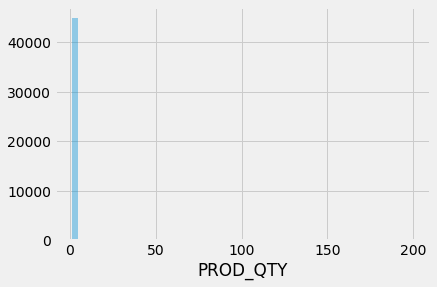

In [23]:
# checking the outlier with the aid of scatter plot
plt.style.use('fivethirtyeight')
sns.distplot(a = chips_product['PROD_QTY'], kde = False)

We can see from the above plot that 200 quantities product are far away from other quanty

In [24]:
# Filter the dataset to find the outlier
chips_product.loc[chips_product['PROD_QTY'] >= 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
11751,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
11752,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer. 

In [25]:
# Let's see if the customer has had other transactions
chips_product.loc[chips_product['LYLTY_CARD_NBR'] == 226000 ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
11751,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
11752,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [26]:
# Count the number of transactions by date
t_day = chips_product.groupby('DATE').size()
t_day

DATE
2018-07-01    103
2018-07-02    125
2018-07-03    125
2018-07-04    123
2018-07-05    137
2018-07-06    132
2018-07-07    136
2018-07-08    126
2018-07-09    121
2018-07-10    144
2018-07-11    137
2018-07-12    116
2018-07-13    125
2018-07-14    131
2018-07-15    129
2018-07-16    131
2018-07-17    137
2018-07-18    129
2018-07-19    104
2018-07-20    142
2018-07-21    114
2018-07-22    119
2018-07-23    109
2018-07-24    143
2018-07-25    120
2018-07-26    113
2018-07-27    118
2018-07-28    124
2018-07-29    132
2018-07-30    116
             ... 
2019-06-01    141
2019-06-02    127
2019-06-03    116
2019-06-04    123
2019-06-05    133
2019-06-06    120
2019-06-07    146
2019-06-08    128
2019-06-09    136
2019-06-10    132
2019-06-11    121
2019-06-12    135
2019-06-13    108
2019-06-14    136
2019-06-15    110
2019-06-16    123
2019-06-17    129
2019-06-18    145
2019-06-19    133
2019-06-20    130
2019-06-21    117
2019-06-22    109
2019-06-23    109
2019-06-24    118
2019-

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's use this sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

Text(0.5, 1.0, 'Transactions over time')

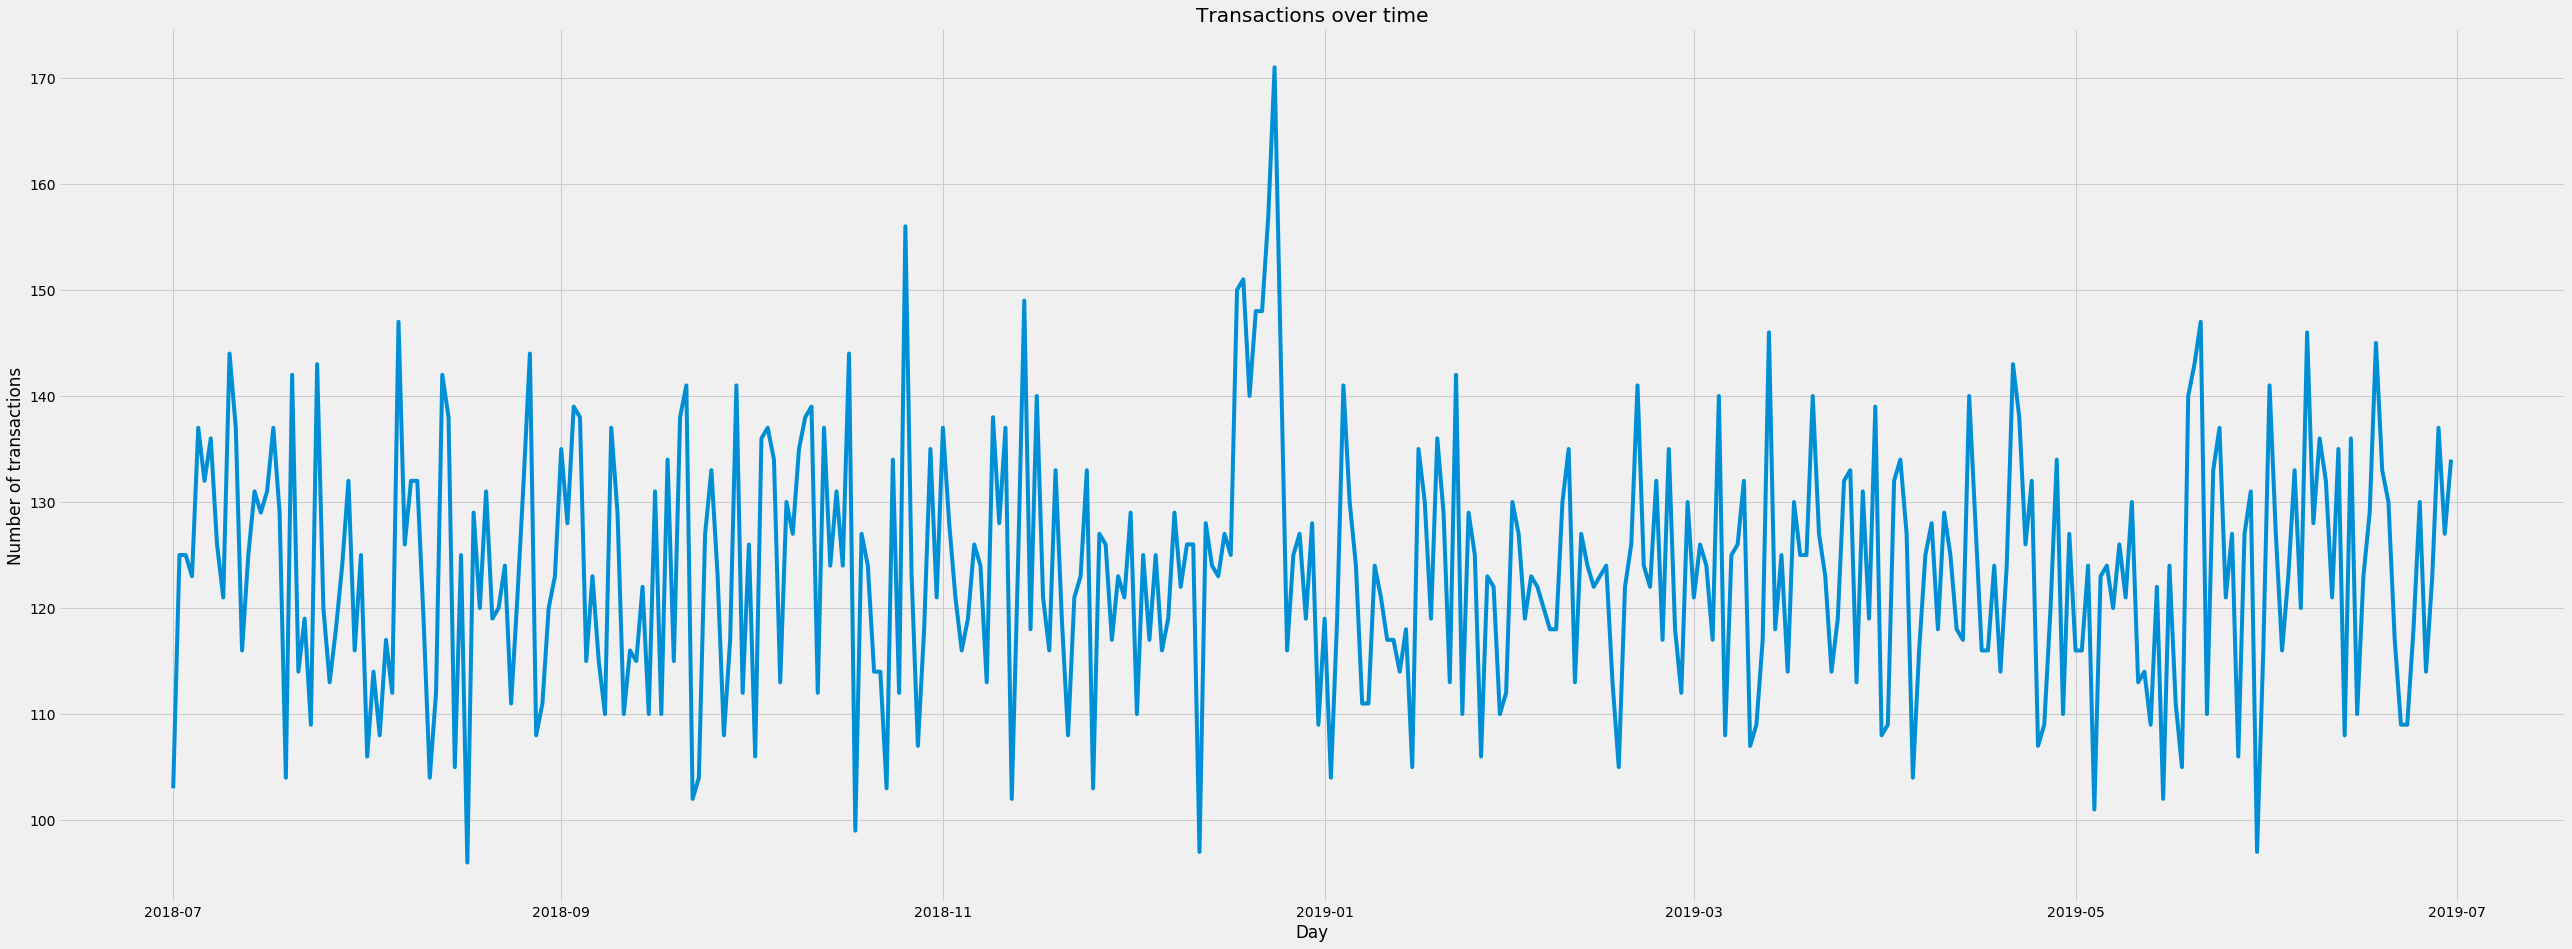

In [27]:
# Plot transactions over time
plt.style.use('fivethirtyeight')
plt.figure(figsize = (40,15))

sns.lineplot(x = t_day.index, y = t_day.values)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')


It will be more clearer if we plot the transaction by month rather than all the transaction days will used above

In [28]:
t_month = chips_product.groupby(pd.Grouper(key = 'DATE', freq = 'M')).size()
t_month

DATE
2018-07-31    3886
2018-08-31    3748
2018-09-30    3678
2018-10-31    3880
2018-11-30    3711
2018-12-31    3857
2019-01-31    3746
2019-02-28    3442
2019-03-31    3833
2019-04-30    3690
2019-05-31    3736
2019-06-30    3790
Freq: M, dtype: int64

Text(0.5, 1.0, 'Transactions over time')

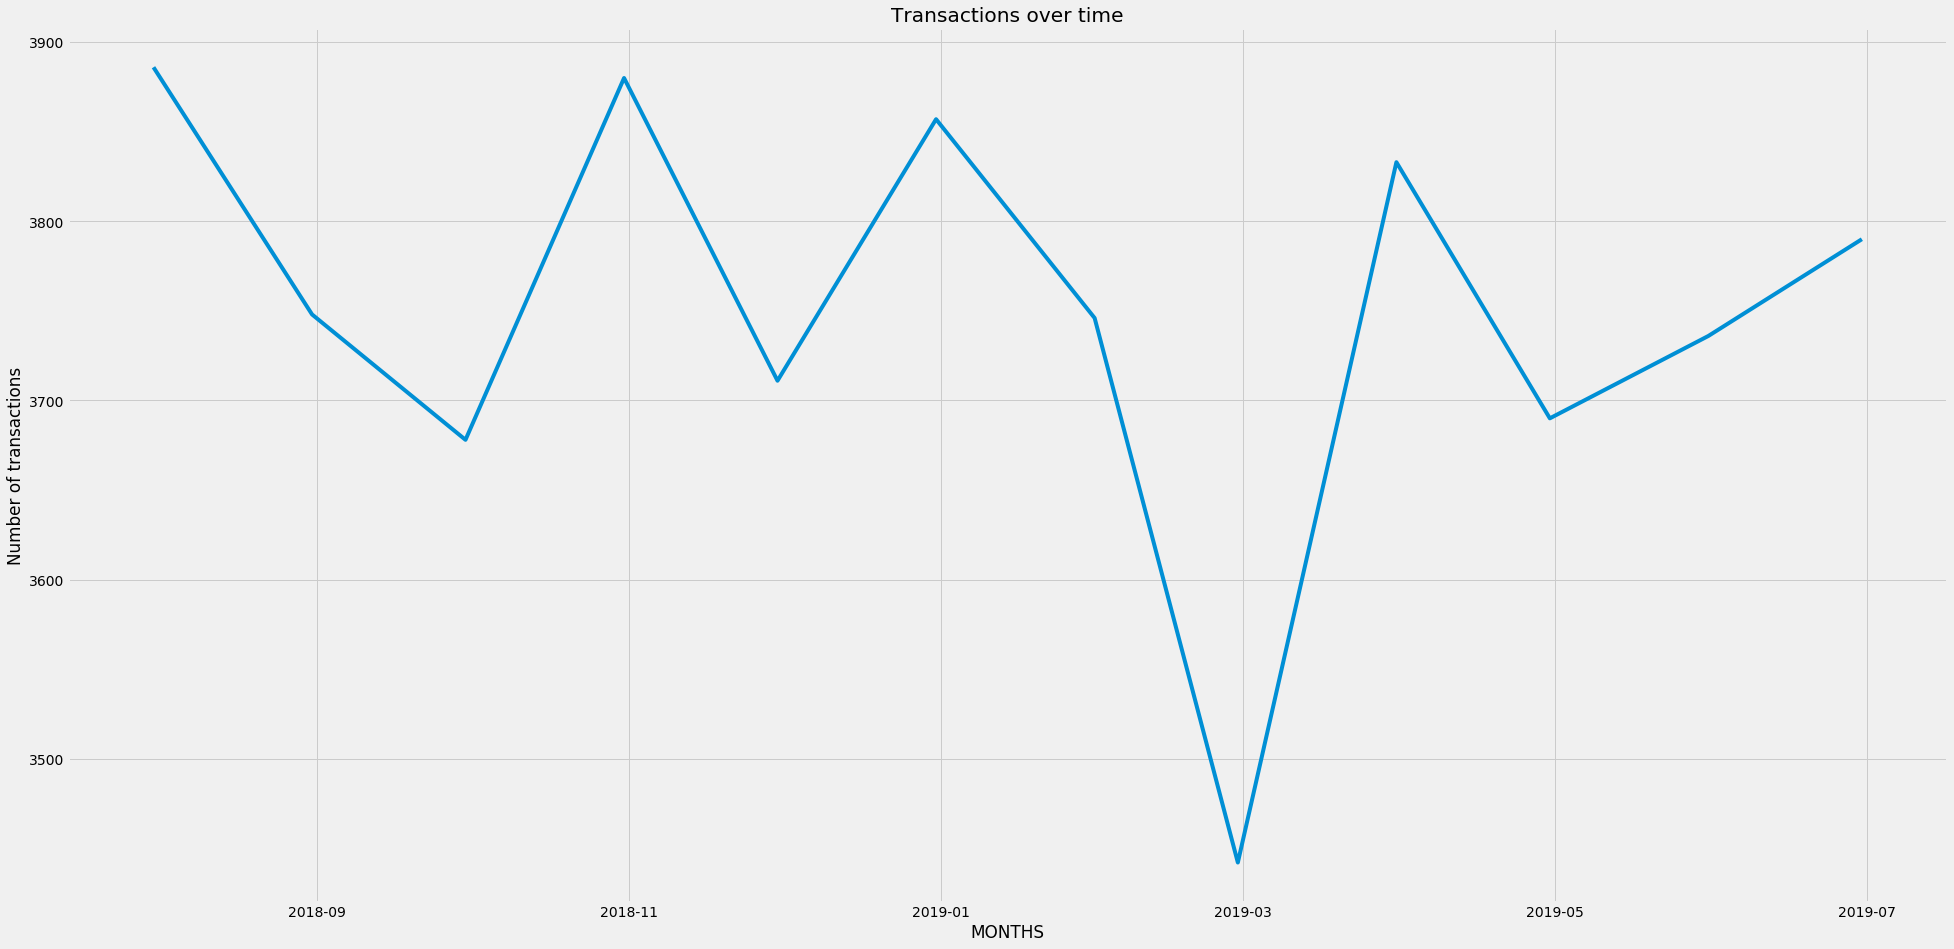

In [29]:
# plot transaction by months
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,15))

sns.lineplot(x = t_month.index, y = t_month.values)
plt.xlabel('MONTHS')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

In [30]:
# Filter to December and look at individual days
Dec_days = chips_product.groupby('DATE').size()

Dec_days = Dec_days["2018-12"]
Dec_days

DATE
2018-12-01    129
2018-12-02    110
2018-12-03    125
2018-12-04    117
2018-12-05    125
2018-12-06    116
2018-12-07    119
2018-12-08    129
2018-12-09    122
2018-12-10    126
2018-12-11    126
2018-12-12     97
2018-12-13    128
2018-12-14    124
2018-12-15    123
2018-12-16    127
2018-12-17    125
2018-12-18    150
2018-12-19    151
2018-12-20    140
2018-12-21    148
2018-12-22    148
2018-12-23    157
2018-12-24    171
2018-12-26    116
2018-12-27    125
2018-12-28    127
2018-12-29    119
2018-12-30    128
2018-12-31    109
dtype: int64

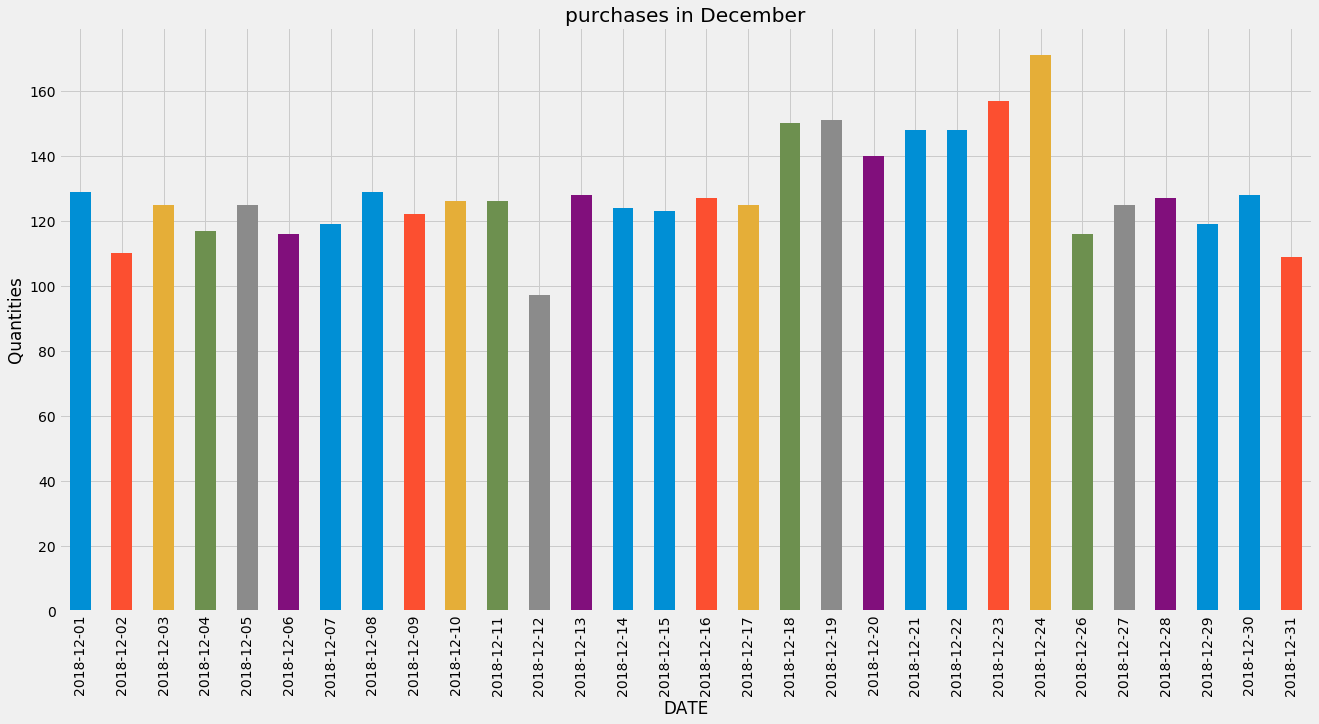

In [31]:
# plot transactions in december
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))

ax = Dec_days.plot(kind = 'bar')
ax.set_title('purchases in December')
ax.set_ylabel('Quantities')
ax.set_xticklabels(Dec_days.index.strftime('%Y-%m-%d'))
plt.show()



We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.

In [32]:
# Let's check if the pack sizes look sensible
chips_product['PACK_SIZE_g'].describe()

count    44997.000000
mean       195.605818
std         77.599373
min        110.000000
25%        170.000000
50%        170.000000
75%        175.000000
max        380.000000
Name: PACK_SIZE_g, dtype: float64

The largest pack_size is 380g and the smallest size is 110g - seems sensible!

__Let's plot a histogram of PACK_SIZE_g since we know that it is a categorical variable and not a continuous variable even though it is numeric.__

Text(0.5, 1.0, 'The number of transactions by pack size.')

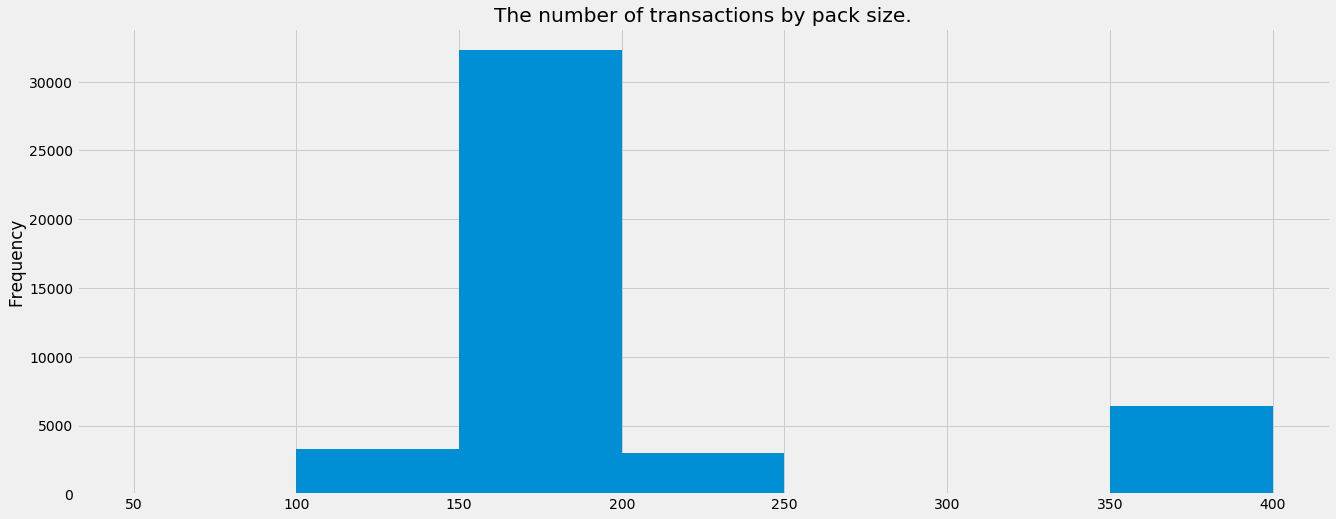

In [33]:
# Let's plot a histogram of PACK_SIZE
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,8))

bins = [50, 100, 150, 200, 250, 300,350,400]
chips_product['PACK_SIZE_g'].plot(kind = 'hist', bins = bins)
plt.title('The number of transactions by pack size.')

We can see from the above distribution that the number of transactions by pack size from the range of 150 to 200 is the highest

__Now let's create brands, we can use the first word in PROD_NAME to work out the brand name__

Create a column which contains the brand of the product, by extracting it from the product_name

In [34]:
# Brand Column
chips_product['BRAND_NAME'] = chips_product['PROD_NAME'].str.split().str.get(0)
chips_product.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos
3,2018-08-17,22,22456,18696,93,Doritos Corn Chip Southern Chicken,1,3.9,150,Doritos
4,2018-08-19,39,39167,35638,111,Smiths Chip Thinly Cut Original,2,6.0,175,Smiths


In [35]:
# Checking brand_name
chips_product['BRAND_NAME'].value_counts()

Doritos    15874
Smiths      9281
Thins       4555
WW          4491
Cobs        3265
Dorito      3185
Natural     2928
French      1418
Name: BRAND_NAME, dtype: int64

Some of the brand names look like they are of the same brands - such as Doritos and Dorito, which are both Doritos chips. Let's combine these together

In [36]:
chips_product['BRAND_NAME'] = chips_product['BRAND_NAME'].replace('Dorito', 'Doritos')
chips_product['BRAND_NAME'].value_counts()

Doritos    19059
Smiths      9281
Thins       4555
WW          4491
Cobs        3265
Natural     2928
French      1418
Name: BRAND_NAME, dtype: int64

Text(0.5, 1.0, 'BRANDS NAME')

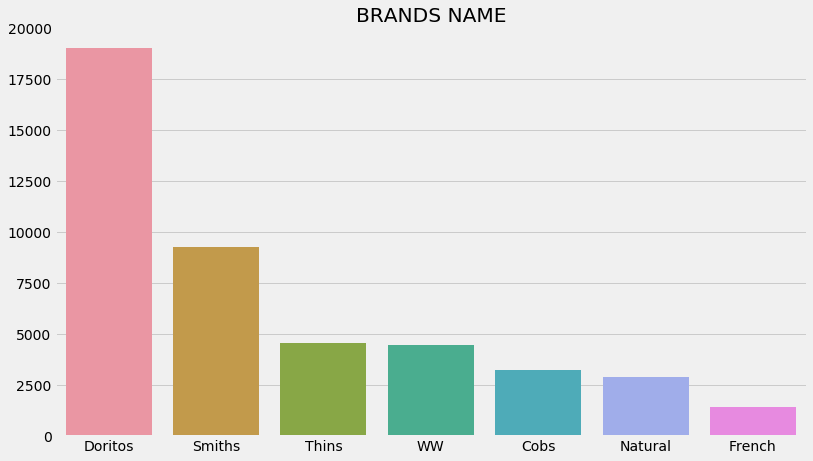

In [37]:
# Visualizing our brand name
brand = chips_product['BRAND_NAME'].value_counts()

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
plt.tight_layout()
sns.barplot(x = brand.index,  y = brand.values)
plt.title('BRANDS NAME')

Doritos is the largest brand name follow by smiths, while the french chips brand is the least

Now that we are happy with the transaction dataset, let's have a look at the customer dataset.¶

## EXAMINING CUSTOMER DATA


In [38]:
c_data = pd.read_csv(r'C:\Users\ABDULAZEEZ R.O\Desktop\QVI_purchase_behaviour.csv')
c_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [77]:
# Let's check the information on this dataset
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


All our columns are in correct data format

In [78]:
# checking the size of the data
nrows, ncols = c_data.shape
print(f'The number of observations are {nrows} \nWhile the number of features are {ncols}')

The number of observations are 72637 
While the number of features are 3


In [39]:
# let's check for missing values
c_data.isnull().values.any()

False

It shows there is no null values in this data

In [40]:
# checking duplicate values
c_data.duplicated('LYLTY_CARD_NBR').sum()

0

__Checking 'LIFESTAGE' culumn__

In [41]:
# checking the number of unique values in 'LIFESTAGE' column
c_data['LIFESTAGE'].nunique()

7

In [42]:
# Display all the unique values with their count
c_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Let's visualize our customers by their lifestage

Text(0.5, 1.0, 'CUSTOMERS LIFESTAGE')

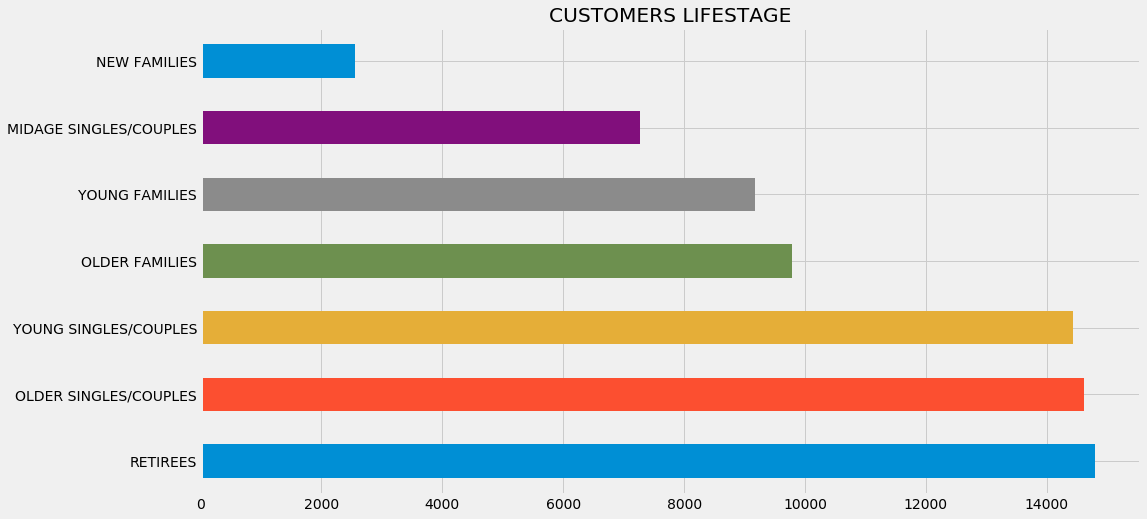

In [43]:
# visualize lifestage column
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 8))
lifestage = c_data['LIFESTAGE'].value_counts()
lifestage.plot(kind = 'barh')
plt.title('CUSTOMERS LIFESTAGE')

__Checking 'PREMIUM_CUSTOMER' column__

In [44]:
# Number of unique values
c_data['PREMIUM_CUSTOMER'].nunique()

3

In [45]:
# Display all the unique values with their count
c_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Let's Visualize our customers base on their premium

Text(0.5, 1.0, 'PREMIUM_CUSTOMERS')

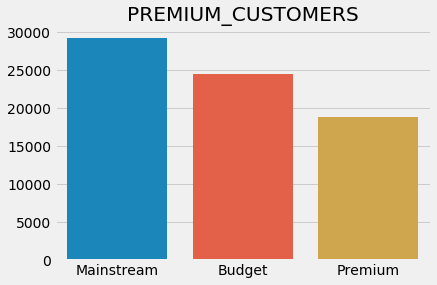

In [46]:
# Visualizing Customer_premium
prem = c_data['PREMIUM_CUSTOMER'].value_counts()

plt.style.use('fivethirtyeight')
sns.barplot(x = prem.index, y = prem.values)
plt.title('PREMIUM_CUSTOMERS')

All our columns are in good condition

### Merge transaction data to customer data

In [47]:
# Merge transaction data to customer data i.e chips_product and c_data
data = chips_product.merge(c_data, how = 'left', on = 'LYLTY_CARD_NBR')
data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget


In [48]:
# checing the size
chips_product.shape
#c_data.shape

(44997, 10)

In [49]:
data.shape

(44997, 12)

As the number of rows in `data` is the same as that of `chips_product`, we can be sure that no duplicates were created. This is because we created `data` by setting `how = left` (in other words, a left join) which means take all the rows in `chips_product` and find rows with matching values in shared columns and then joining the details in these rows to the first mentioned table

Let's also check if some customers were not matched on by checking for nulls.

In [50]:
# checking for null values
data.isnull().values.any()

False

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

In [51]:
# Let's save our data to csv file for further analysis
data.to_csv('Quantium_data.csv', index = False)

__Data exploration is now complete!__

# Data analysis on customer segments

In [96]:
data = pd.read_csv(r'C:\Users\ABDULAZEEZ R.O\Desktop\Quantium_data.csv')
data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget


Now that the data is ready for analysis, we can define some metrics of interest to the client:

- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is 
- How many customers are in each segment 
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

__Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.__

In [97]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
tot_sales_lif_prem = data.groupby(['PREMIUM_CUSTOMER', 
                                   'LIFESTAGE'])['TOT_SALES'].sum().sort_values(ascending = False).to_frame('SUM_SALES').reset_index()
tot_sales_lif_prem

,PREMIUM_CUSTOMER,LIFESTAGE,SUM_SALES
0,Budget,OLDER FAMILIES,28233.35
1,Mainstream,YOUNG SINGLES/COUPLES,26502.00
2,Mainstream,RETIREES,26067.95
3,Budget,YOUNG FAMILIES,24274.95
4,Mainstream,OLDER SINGLES/COUPLES,23464.10
5,Budget,OLDER SINGLES/COUPLES,23306.90
6,Premium,OLDER SINGLES/COUPLES,22694.95
7,Budget,RETIREES,19399.00
8,Mainstream,OLDER FAMILIES,17710.55
9,Mainstream,YOUNG FAMILIES,16193.05


Text(0.5, 1.0, 'Total sales by LIFESTAGE and PREMIUM_CUSTOMER')

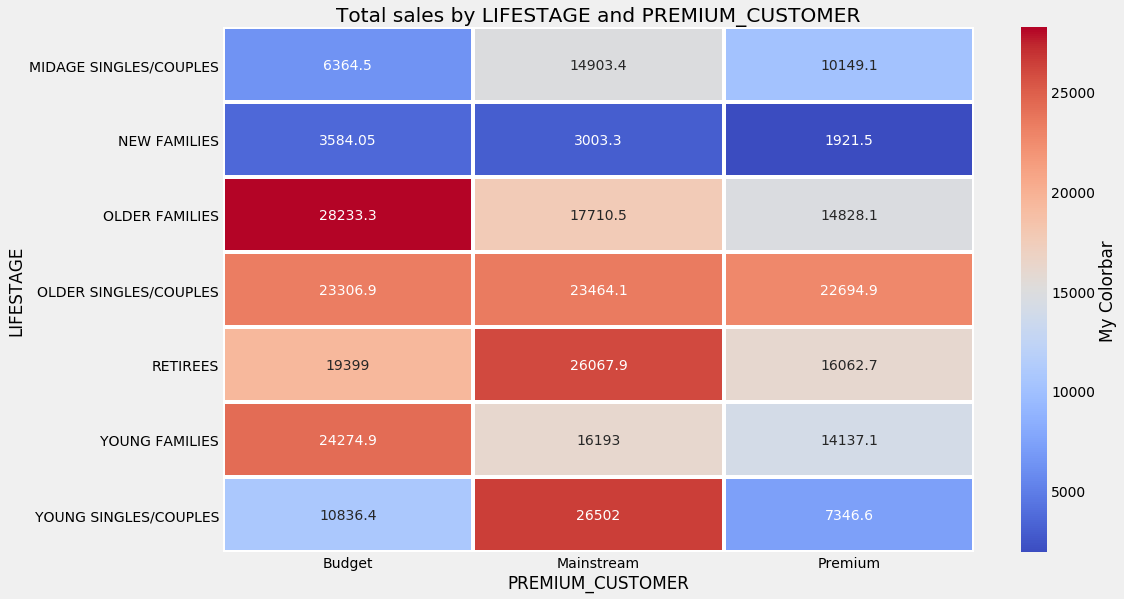

In [117]:
# pandas pivot
heatmap1_data = pd.pivot_table(tot_sales_lif_prem, values= 'SUM_SALES', index= 'LIFESTAGE', columns= 'PREMIUM_CUSTOMER')
#heatmap1_data 

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,9))

sns.heatmap(heatmap1_data, annot = True, cmap= 'coolwarm', fmt='g', linewidths=3, cbar_kws={'label': 'My Colorbar'})
plt.title('Total sales by LIFESTAGE and PREMIUM_CUSTOMER')

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

Let's see if the higher sales are due to there being more customers who buy chips.

__Let's  Calculate the summary of number of customers by those dimensions and create a plot.__


In [119]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
count_sales_lif_prem = data.groupby(['PREMIUM_CUSTOMER', 
                                     'LIFESTAGE'])['TOT_SALES'].count().sort_values(ascending = False).to_frame('COUNT_SALES').reset_index()
count_sales_lif_prem

,PREMIUM_CUSTOMER,LIFESTAGE,COUNT_SALES
0,Budget,OLDER FAMILIES,3866
1,Mainstream,RETIREES,3563
2,Mainstream,YOUNG SINGLES/COUPLES,3459
3,Budget,YOUNG FAMILIES,3324
4,Mainstream,OLDER SINGLES/COUPLES,3188
5,Budget,OLDER SINGLES/COUPLES,3151
6,Premium,OLDER SINGLES/COUPLES,3054
7,Budget,RETIREES,2595
8,Mainstream,OLDER FAMILIES,2422
9,Mainstream,YOUNG FAMILIES,2246


Text(0.5, 1.0, 'Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')

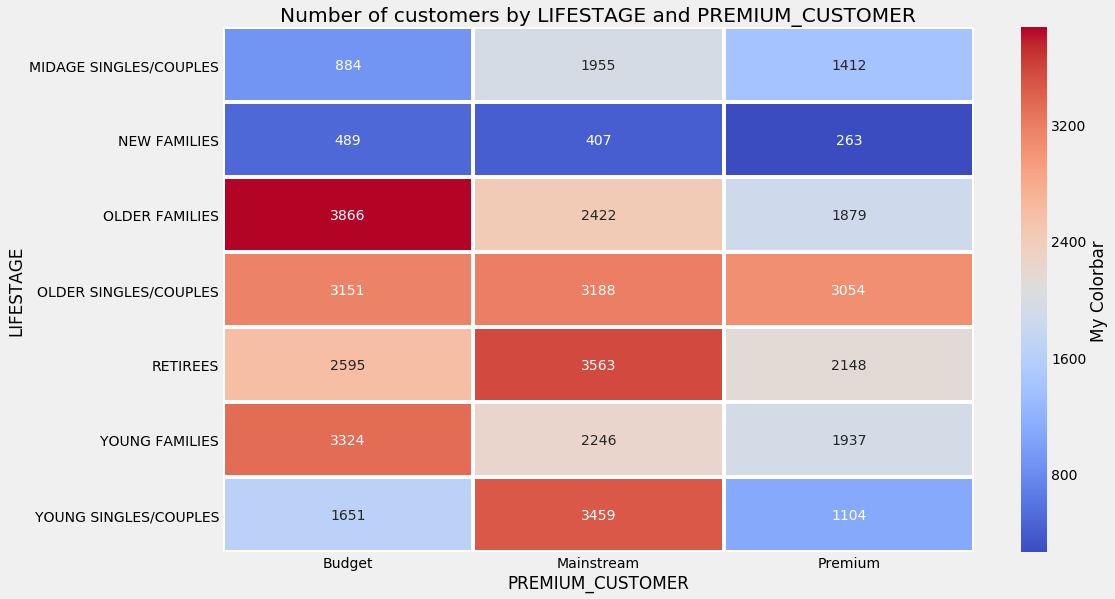

In [121]:
# pandas pivot
heatmap_data = pd.pivot_table(count_sales_lif_prem, values= 'COUNT_SALES', index= 'LIFESTAGE', columns= 'PREMIUM_CUSTOMER')
#heatmap1_data 

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,9))

sns.heatmap(heatmap_data, annot = True, cmap= 'coolwarm', fmt='g', linewidths=3, cbar_kws={'label': 'My Colorbar'})
plt.title('Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')

There are more Mainstream - retirees and Mainstream - young singles/couples who buy chips. This contributes to there being more sales to these customer segments but this is also a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.

__Let's calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER__


In [57]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_lif_pre = data.groupby(['PREMIUM_CUSTOMER', 
                            'LIFESTAGE'])['PROD_QTY'].mean().sort_values(ascending = False).to_frame('AVG_UNIT').reset_index()
avg_lif_pre

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_UNIT
0,Premium,OLDER FAMILIES,2.165514
1,Mainstream,OLDER FAMILIES,1.944674
2,Budget,OLDER FAMILIES,1.941800
3,Budget,YOUNG FAMILIES,1.941035
4,Mainstream,YOUNG FAMILIES,1.939893
5,Premium,YOUNG FAMILIES,1.928756
6,Mainstream,MIDAGE SINGLES/COUPLES,1.918670
7,Premium,OLDER SINGLES/COUPLES,1.914866
8,Mainstream,OLDER SINGLES/COUPLES,1.913425
9,Budget,OLDER SINGLES/COUPLES,1.908600


Text(0.5, 1.0, 'The average number of units per customer')

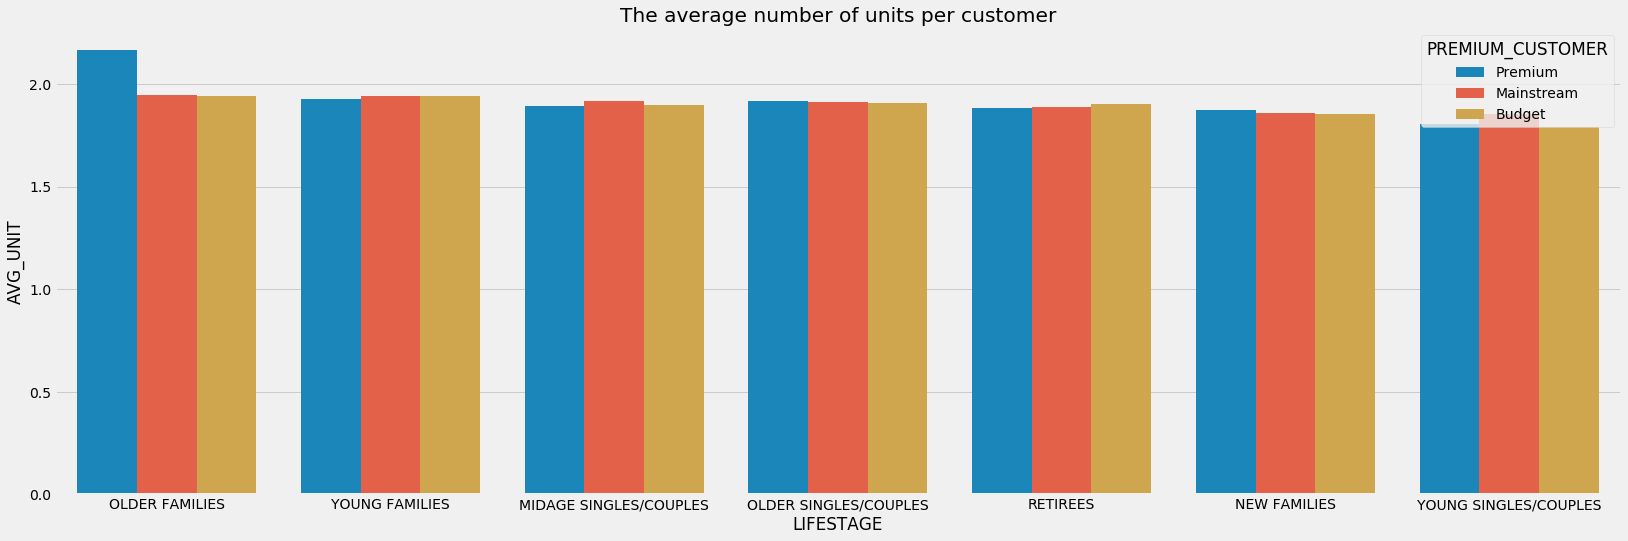

In [58]:
# plot the average number of units per customer 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (25,8))

sns.barplot(x="LIFESTAGE", y = "AVG_UNIT", hue="PREMIUM_CUSTOMER", data= avg_lif_pre)
plt.title('The average number of units per customer')

Older families and young families in general buy more chips per customer


__Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.__

__Let's calculate and plot the average price per unit sold (average sale price) by those two customer dimensions.__

In [59]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_sales_lif_prem = data.groupby(['PREMIUM_CUSTOMER', 
                                     'LIFESTAGE'])['TOT_SALES'].mean().sort_values(ascending = False).to_frame('AVG_SALES').reset_index()
avg_sales_lif_prem

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_SALES
0,Premium,OLDER FAMILIES,7.891485
1,Mainstream,YOUNG SINGLES/COUPLES,7.661752
2,Mainstream,MIDAGE SINGLES/COUPLES,7.623248
3,Premium,RETIREES,7.478003
4,Budget,RETIREES,7.475530
5,Premium,OLDER SINGLES/COUPLES,7.431221
6,Budget,OLDER SINGLES/COUPLES,7.396668
7,Mainstream,NEW FAMILIES,7.379115
8,Mainstream,OLDER SINGLES/COUPLES,7.360132
9,Budget,NEW FAMILIES,7.329346


Text(0.5, 1.0, 'Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER')

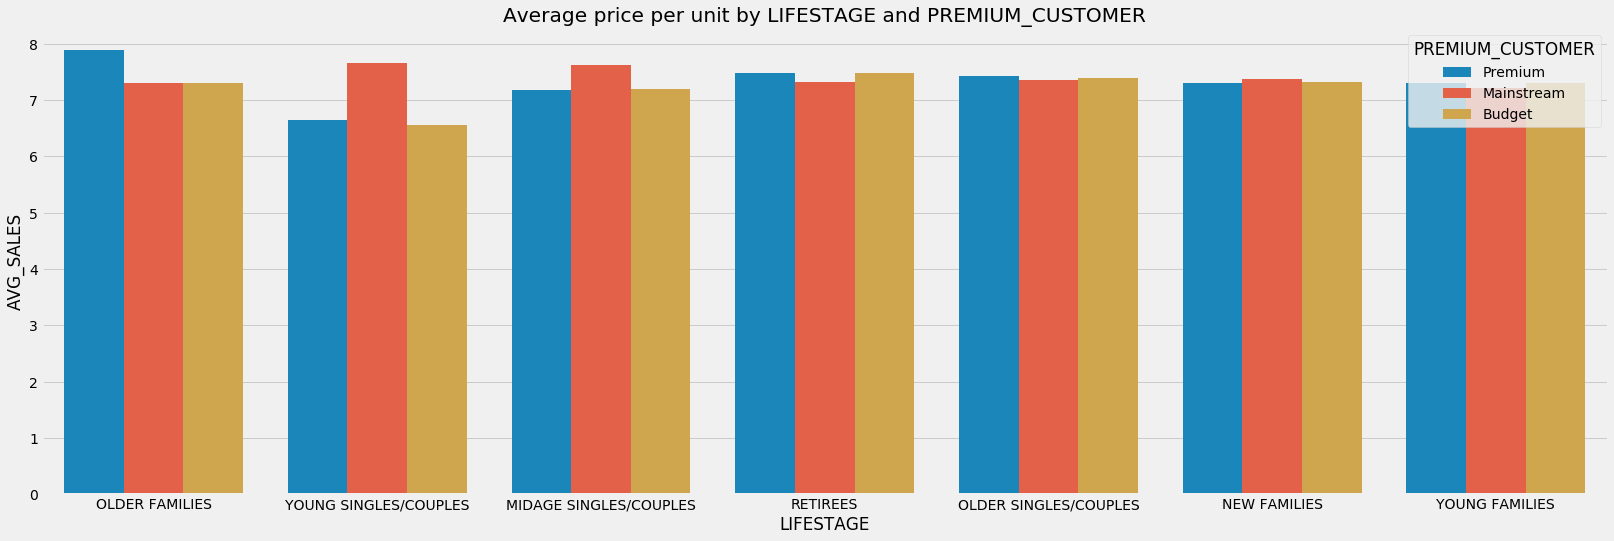

In [60]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
plt.style.use('fivethirtyeight')
plt.figure(figsize = (25,8))

sns.barplot(x="LIFESTAGE", y = "AVG_SALES", hue="PREMIUM_CUSTOMER", data= avg_sales_lif_prem)
plt.title('Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER')

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different

__Let's Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples__


In [61]:
#  Perform a t-test to see if the difference is significant.
avg_sales_lif_prem.head(3)

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_SALES
0,Premium,OLDER FAMILIES,7.891485
1,Mainstream,YOUNG SINGLES/COUPLES,7.661752
2,Mainstream,MIDAGE SINGLES/COUPLES,7.623248


In [62]:
# Let's change this dataframe to pivot table for easy application of t_test
avg_pivot_tab = avg_sales_lif_prem.pivot_table(values = 'AVG_SALES', index = 'LIFESTAGE', columns =  'PREMIUM_CUSTOMER')
avg_pivot_tab

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,7.199661,7.623248,7.187783
NEW FAMILIES,7.329346,7.379115,7.306084
OLDER FAMILIES,7.302988,7.312366,7.891485
OLDER SINGLES/COUPLES,7.396668,7.360132,7.431221
RETIREES,7.475530,7.316292,7.478003
YOUNG FAMILIES,7.302933,7.209728,7.298451
YOUNG SINGLES/COUPLES,6.563537,7.661752,6.654529


In [63]:
#  removing mainstream vs premium and budget midage and young singles/couples from the table
ttes = avg_pivot_tab.loc[['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']]
ttes

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,7.199661,7.623248,7.187783
YOUNG SINGLES/COUPLES,6.563537,7.661752,6.654529


In [66]:
# mainstream vs Budget t_test
tt_M_B = scipy.stats.ttest_ind(ttes['Mainstream'], ttes['Budget'])
tt_M_B

Ttest_indResult(statistic=2.387936167303519, pvalue=0.13957263521854202)

In [67]:
# mainstream vs premium t_test
tt_M_P = scipy.stats.ttest_ind(ttes['Mainstream'], ttes['Premium'])
tt_M_P

Ttest_indResult(statistic=2.698415340538003, pvalue=0.11427074115572322)

The t-test results in a p-value of 0.140, i.e. the unit price for mainstream, young and mid-age singles and couples ARE NOT significantly higher than that of budget or premium, young and midage singles and couples.

We have found quite a few interesting insights that we can dive deeper into. 

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

Work out of there are brands that these two customer segments prefer more than others. You could use a technique called affinity analysis or a-priori analysis (or any other method if you prefer

__Splitting the data according to the brand of transaction__

## a-priori analysis

Now, we are ready to start our a-priori analysis. First, we’ll groupby the columns that we want to consider. For the purposes of this analysis, we’ll only look at the Mainstream.

In [68]:
# First, we need to get our mlxtend libraries imported
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [69]:
# # Deep dive into Mainstream
mainstream_basket = (data[data['PREMIUM_CUSTOMER'] =="Mainstream"]
                 .groupby(['LYLTY_CARD_NBR', 'BRAND_NAME'])['TOT_SALES'])

In [70]:
mainstream_basket = mainstream_basket.sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')
mainstream_basket.head()

BRAND_NAME,Cobs,Doritos,French,Natural,Smiths,Thins,WW
LYLTY_CARD_NBR,,,,,,,
1004,0.0,0.0,0.0,0.0,0.0,0.0,1.9
1011,0.0,0.0,0.0,0.0,2.9,0.0,0.0
1048,0.0,4.4,0.0,0.0,2.9,0.0,0.0
1053,0.0,4.4,0.0,0.0,0.0,0.0,0.0
1056,0.0,3.9,0.0,0.0,0.0,0.0,0.0


Looks like a bunch of zeros. What good is that? Well…its exactly what we want to see. We’ve encoded our data to show when a brand is sold with another brand. If there is a zero, that means those brands haven’t sold together. Before we continue, we want to convert all of our numbers to either a `1` or a `0` (negative numbers are converted to zero, positive numbers are converted to 1). We can do this encoding step with the following function:

Next, we want to hot encode the data and get 1 transaction per row to prepare to run our mlxtend analysis.

In [72]:
# Defining the hot encoding function to make the data suitable for the concerned libraries 
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [73]:
# Encoding the datasets 
mainstream_basket = mainstream_basket.applymap(encode_data)

Now, lets find out which brands are frequently purchased together. We do this by applying the mlxtend `apriori` fuuinction to our dataset.

There one thing we need to think about first. the `apriori` function requires us to provide a minimum level of ‘support’. Support is defined as the percentage of time that an itemset appears in the dataset. If you set support = 50%, you’ll only get itemsets that appear 50% of the time. I like to set support to around 5% when starting out to be able to see some data/results and then adjust from there. Setting the support level to high could lead to very few (or no) results and setting it too low could require an enormous amount of memory to process the data.

In the case of this data, I originally set the `min_support` to 0.05 but didn’t receive any results, so I changed it to 0.01.

In [75]:
itemsets = apriori(mainstream_basket, min_support=0.01, use_colnames=True)

The final step is to build your association rules using the mxltend `association_rules` function. You can set the metric that you are most interested in (either `lift` or `confidence` and set the minimum threshold for the condfidence level (called `min_threshold`). The `min_threshold` can be thought of as the level of confidence percentage that you want to return. For example, if you set `min_threshold` to 1, you will only see rules with 100% confidence. I will set this to 0.7 to start with.

In [76]:
rules = association_rules(itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cobs),(Doritos),0.101695,0.533414,0.027522,0.270635,0.507364,-0.026723,0.639715
1,(Doritos),(Cobs),0.533414,0.101695,0.027522,0.051596,0.507364,-0.026723,0.947176
2,(Cobs),(Smiths),0.101695,0.257385,0.013317,0.130952,0.508780,-0.012858,0.854516
3,(Smiths),(Cobs),0.257385,0.101695,0.013317,0.051740,0.508780,-0.012858,0.947320
4,(Natural),(Smiths),0.079338,0.257385,0.016465,0.207528,0.806294,-0.003956,0.937087
5,(Smiths),(Natural),0.257385,0.079338,0.016465,0.063970,0.806294,-0.003956,0.983581
6,(Smiths),(Thins),0.257385,0.135432,0.018483,0.071809,0.530225,-0.016375,0.931455
7,(Thins),(Smiths),0.135432,0.257385,0.018483,0.136472,0.530225,-0.016375,0.859978
8,(Smiths),(WW),0.257385,0.117514,0.022760,0.088429,0.752497,-0.007486,0.968093
9,(WW),(Smiths),0.117514,0.257385,0.022760,0.193681,0.752497,-0.007486,0.920994


With this, we generate 10 rules for our a-priori analysis. This gives us a good number of data points to look at for this analysis. Now, what does this tell us?

If we look in the `antecedents` column and the `consequents` column, you’ll see names of brands. Each rule tells us that the `antecedents` is sold along with the `consequents`.

## Visualizing results

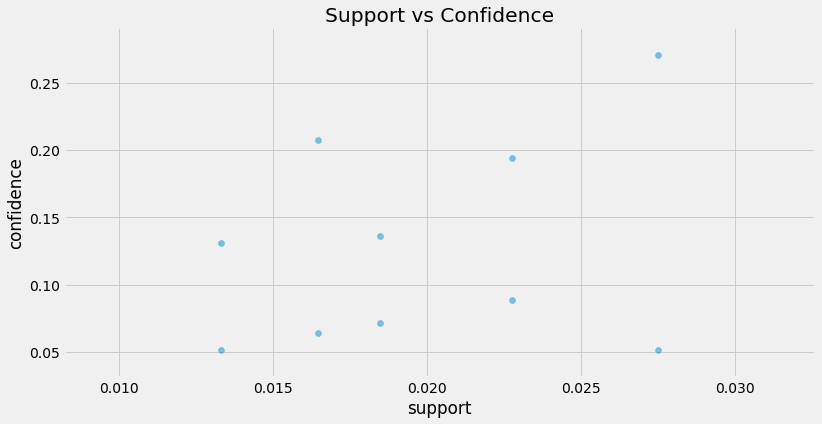

In [113]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

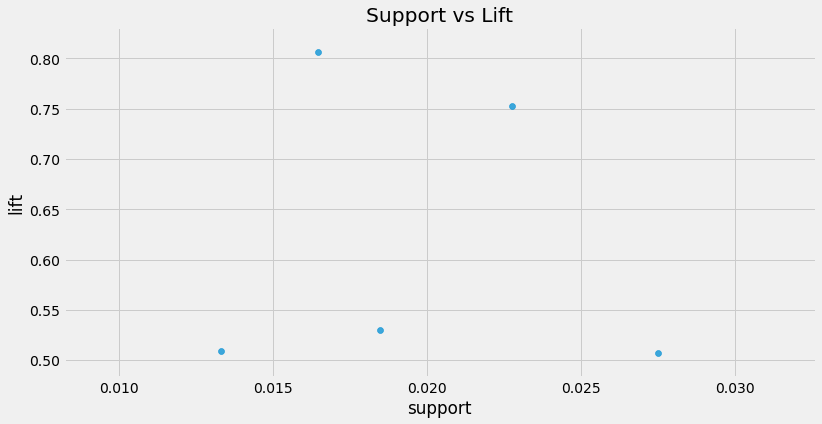

In [78]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

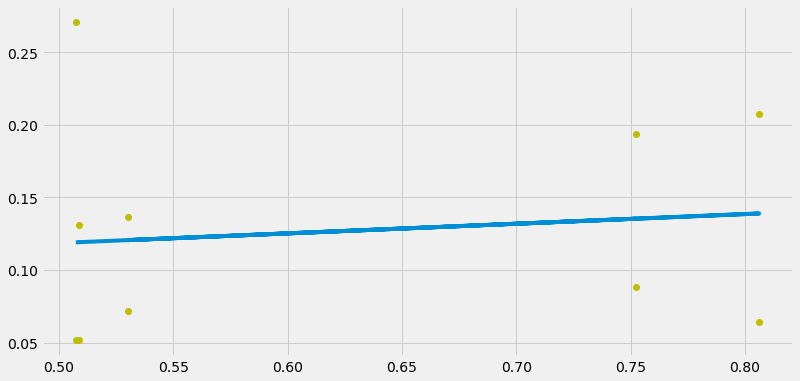

In [79]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))

Let's discus the first row in the table above, The rule states that `(Doritos)` brand and `(Cobs)` brand are bought frequently. The support for  `(Doritos)` brand is 0.027522. The confidence for this rule is 0.051596 which means that out of all the transactions containing `(Doritos)` brand, 5.16% of the transactions are likely to contain `(Cobs)` brand as well. Finally, lift of 0.507364 shows that the `(Cobs)` brand is 0.507364 more likely to be bought by the customers that buy `(Doritos)` brand, compared to its default sale.

Let's apply the above steps to the young singles/couples segments

### Deep dive into young singles/couples 

In [80]:
# YOUNG SINGLES/COUPLES
YOUNG_SINGLES_COUPLES = (data[data['LIFESTAGE'] =="YOUNG SINGLES/COUPLES"]
                 .groupby(['LYLTY_CARD_NBR', 'BRAND_NAME'])['TOT_SALES'])

YOUNG_SINGLES_COUPLES = YOUNG_SINGLES_COUPLES.sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')
YOUNG_SINGLES_COUPLES.head()

BRAND_NAME,Cobs,Doritos,French,Natural,Smiths,Thins,WW
LYLTY_CARD_NBR,,,,,,,
1000,0.0,0.0,0.0,6.0,0.0,0.0,0.0
1024,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1051,0.0,0.0,0.0,0.0,5.8,0.0,0.0
1060,0.0,4.4,0.0,0.0,0.0,0.0,0.0
1086,3.8,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [82]:
YOUNG_SINGLES_COUPLES = YOUNG_SINGLES_COUPLES.applymap(encode_data)
itemsets = apriori(YOUNG_SINGLES_COUPLES, min_support=0.01, use_colnames=True)
rules = association_rules(itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Natural),(Smiths),0.072889,0.236688,0.010124,0.138889,0.586803,-0.007128,0.886427
1,(Smiths),(Natural),0.236688,0.072889,0.010124,0.042772,0.586803,-0.007128,0.968537
2,(Smiths),(WW),0.236688,0.105892,0.016400,0.069290,0.654347,-0.008663,0.960673
3,(WW),(Smiths),0.105892,0.236688,0.016400,0.154876,0.654347,-0.008663,0.903195


With this, we generate 4 rules for our a-priori analysis on YOUNG_SINGLES_COUPLES.

Let's discus the first row in the table above, The rule states that `(Natural)` brand and `(Smiths)` brand are bought frequently. The support for  `(Natural)` brand is 0.010124. The confidence for this rule is 0.138889 which means that out of all the transactions containing `(Natural)` brand, 13.89% of the transactions are likely to contain `(Smiths)` brand as well. Finally, lift of 0.586803 shows that the `(Smiths)` brand is 0.586803 more likely to be bought by the customers that buy `(Natural)` brand, compared to its default sale.

## Let's also find out if our target segment tends to buy larger packs of chips

In [83]:
# Mainstream-pack_size
mainstream_pack_size = (data[data['PREMIUM_CUSTOMER'] == "Mainstream"]
                 .groupby(['LYLTY_CARD_NBR', 'PACK_SIZE_g'])['TOT_SALES'])

mainstream_pack_size = mainstream_pack_size.sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')
mainstream_pack_size.head()

PACK_SIZE_g,110,150,160,170,175,200,380
LYLTY_CARD_NBR,,,,,,,
1004,0.0,0.0,1.9,0.0,0.0,0.0,0.0
1011,0.0,0.0,0.0,2.9,0.0,0.0,0.0
1048,0.0,0.0,0.0,7.3,0.0,0.0,0.0
1053,0.0,0.0,0.0,4.4,0.0,0.0,0.0
1056,0.0,3.9,0.0,0.0,0.0,0.0,0.0


In [84]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [85]:
mainstream_pack_size = mainstream_pack_size.applymap(encode_data)
itemsets = apriori(mainstream_pack_size, min_support=0.01, use_colnames=True)
rules = association_rules(itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(170),(110),0.392736,0.101695,0.020016,0.050966,0.501165,-0.019923,0.946547
1,(110),(170),0.101695,0.392736,0.020016,0.196825,0.501165,-0.019923,0.756080
2,(380),(110),0.197094,0.101695,0.010412,0.052826,0.519451,-0.009632,0.948405
3,(110),(380),0.101695,0.197094,0.010412,0.102381,0.519451,-0.009632,0.894484
4,(380),(150),0.197094,0.193947,0.020662,0.104832,0.540520,-0.017564,0.900449
5,(150),(380),0.193947,0.197094,0.020662,0.106533,0.540520,-0.017564,0.898641
6,(170),(175),0.392736,0.278370,0.057224,0.145705,0.523422,-0.052102,0.844709
7,(175),(170),0.278370,0.392736,0.057224,0.205567,0.523422,-0.052102,0.764399
8,(200),(170),0.080630,0.392736,0.017595,0.218218,0.555636,-0.014071,0.776769
9,(170),(200),0.392736,0.080630,0.017595,0.044801,0.555636,-0.014071,0.962491


With this, we generate 12 rules for our a-priori analysis on mainstream segment on pack_size

## VISUALISING OF RESULTS

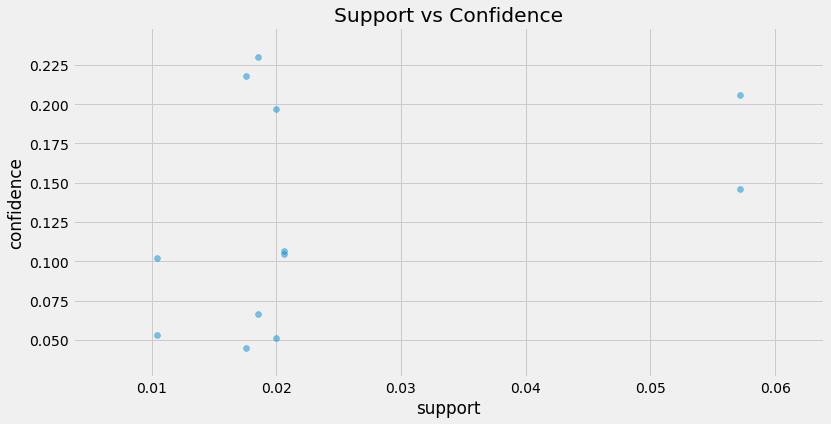

In [123]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

Let's discus the largest pack_size in the third row, the row state that the largest pack_size which is `(380)` and the smallest pack_size which is `(110)` are bought frequently, this might be as a result of activities share by most people because people tend to buy large size or small size of chips base on their situation. The confidence of the largest pack size is 0.052826 which means that out of all the transactions carried out by mainstream segment, 5.3% of the transactions are likely to contains smallest pack_size.

__Let's look at YOUNG SINGLES/COUPLES pack_size transaction__

In [86]:
# YOUNG SINGLES/COUPLES pack_size transaction
YOUNG_SINGLES_COUPLES_pack_size = (data[data['LIFESTAGE'] =="YOUNG SINGLES/COUPLES"]
                 .groupby(['LYLTY_CARD_NBR', 'PACK_SIZE_g'])['TOT_SALES'])

YOUNG_SINGLES_COUPLES_pack_size = YOUNG_SINGLES_COUPLES_pack_size.sum().unstack().reset_index().fillna(0).set_index('LYLTY_CARD_NBR')
YOUNG_SINGLES_COUPLES_pack_size.head()

PACK_SIZE_g,110,150,160,170,175,200,380
LYLTY_CARD_NBR,,,,,,,
1000,0.0,0.0,0.0,0.0,6.0,0.0,0.0
1024,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1051,0.0,0.0,0.0,5.8,0.0,0.0,0.0
1060,0.0,0.0,0.0,4.4,0.0,0.0,0.0
1086,3.8,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [88]:
YOUNG_SINGLES_COUPLES_pack_size = YOUNG_SINGLES_COUPLES_pack_size.applymap(encode_data)
itemsets = apriori(YOUNG_SINGLES_COUPLES_pack_size, min_support=0.01, use_colnames=True)
rules = association_rules(itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(200),(175),0.069245,0.265843,0.01478,0.213450,0.802918,-0.003628,0.933389
1,(175),(200),0.265843,0.069245,0.01478,0.055598,0.802918,-0.003628,0.985550


We generate only 2 rules for our a-priori analysis on YOUNG_SINGLES_COUPLES segment on pack_size. On young single/couples segment, 200g pack size are frequently bought with 175g by diffrent customers in this segment.

__This come to the end of Apriori Analysis.
Thanks for reading to the end__